In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("Boston.csv")

In [3]:
corr=df.corr()

In [4]:
# corr

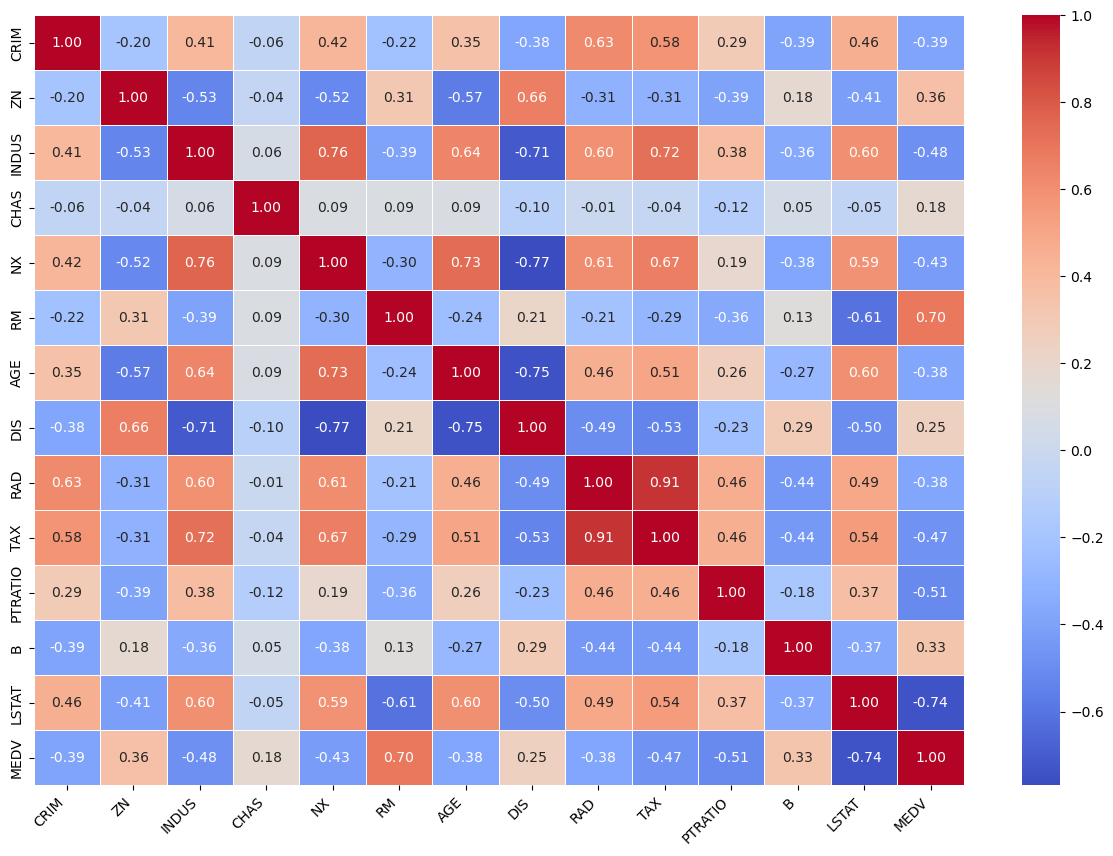

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,fmt="0.2f",annot=True,linewidths=0.5,linecolor="white",cmap="coolwarm")
plt.xticks(rotation=45,ha='right')
plt.show()

In [6]:
df_num_col=df.select_dtypes(include="number").columns
df_num_col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

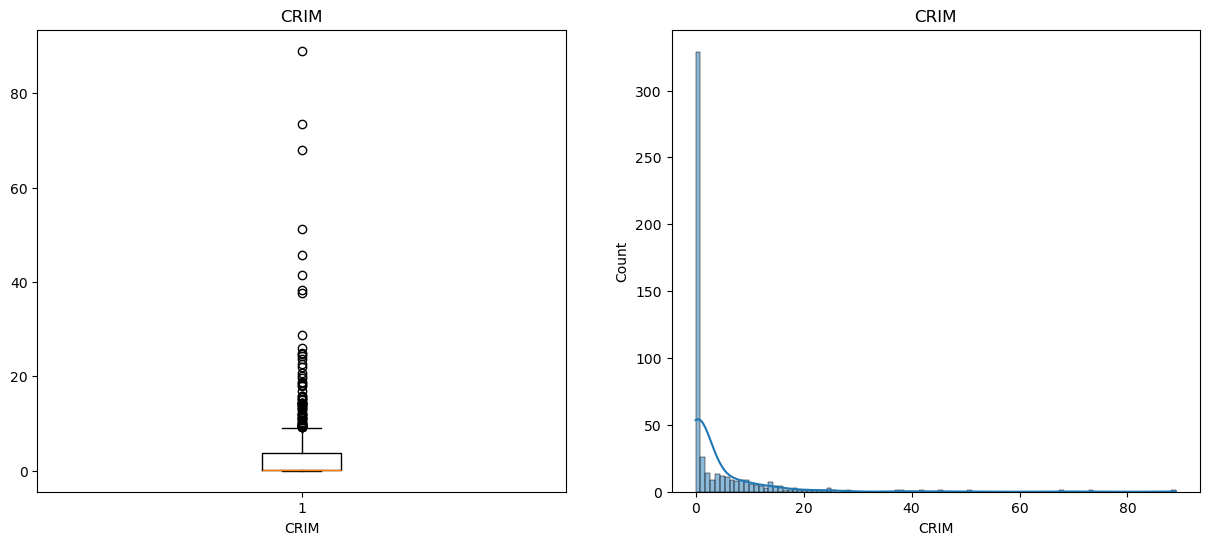

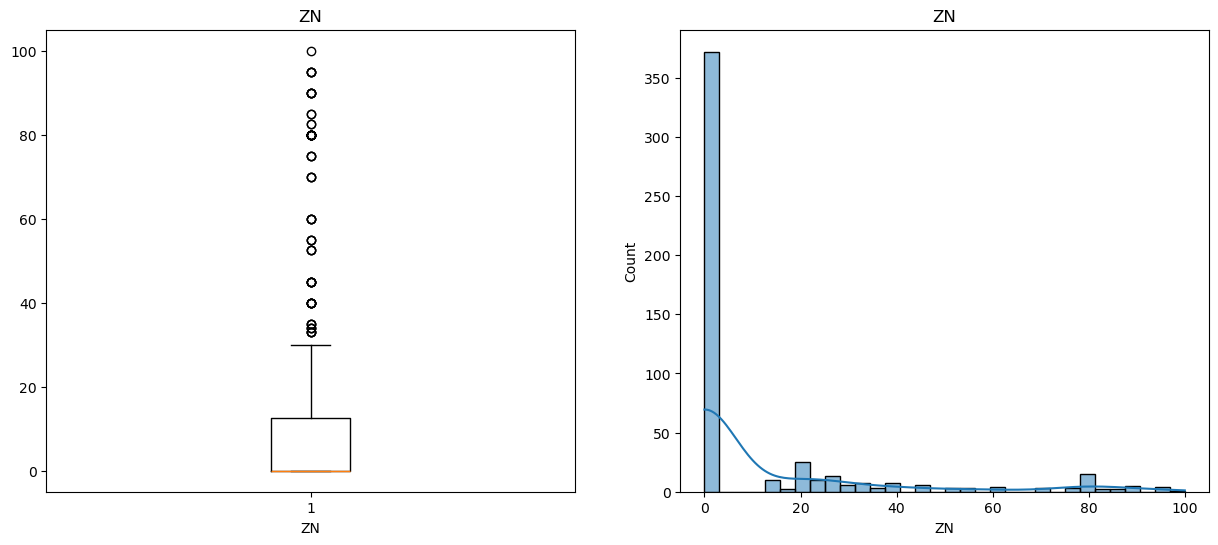

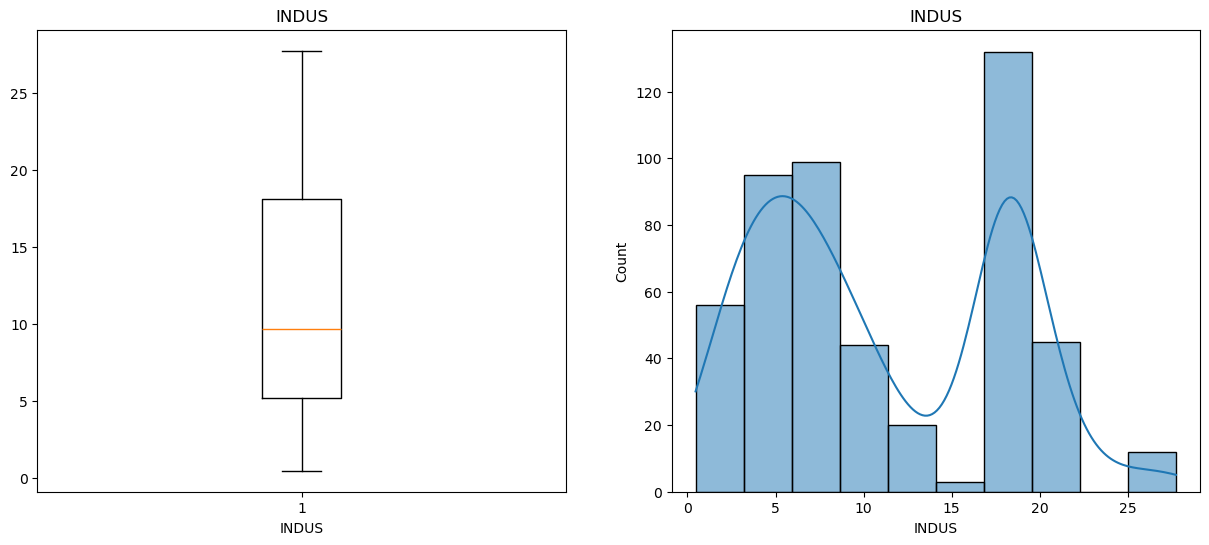

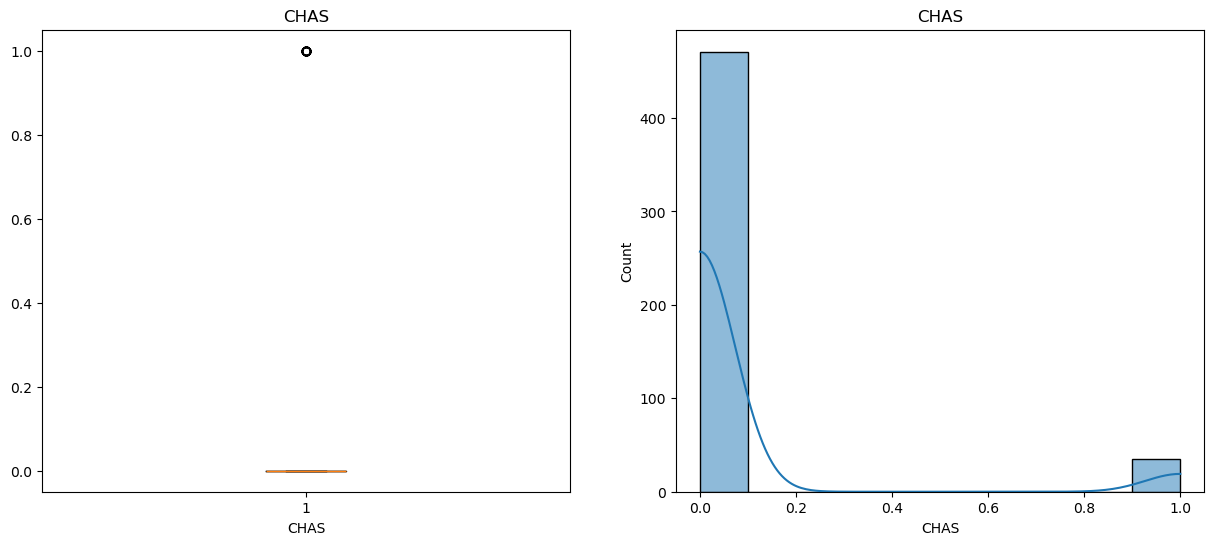

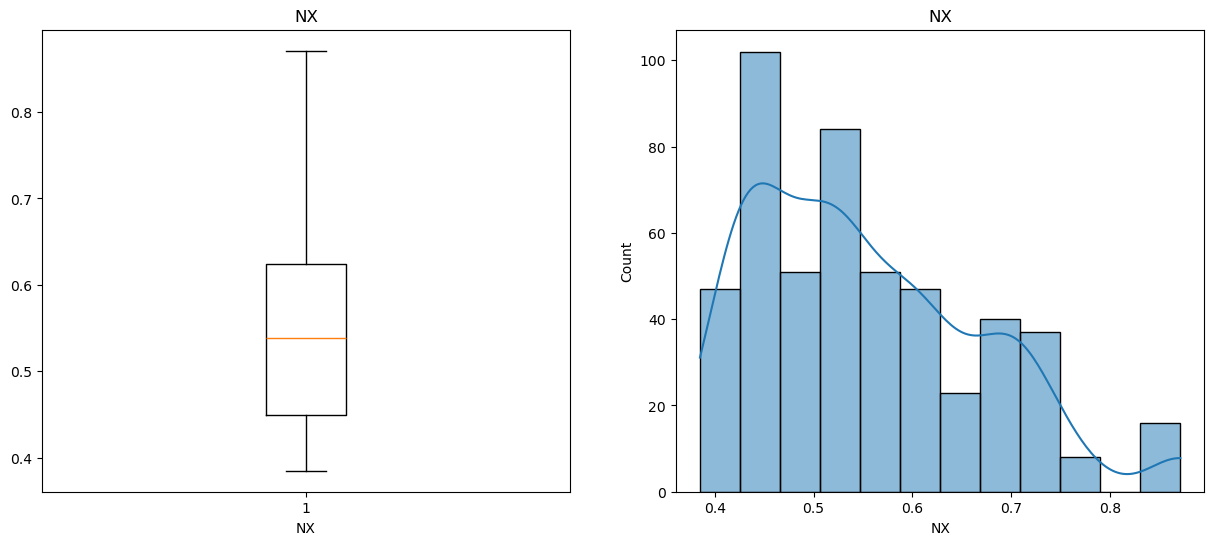

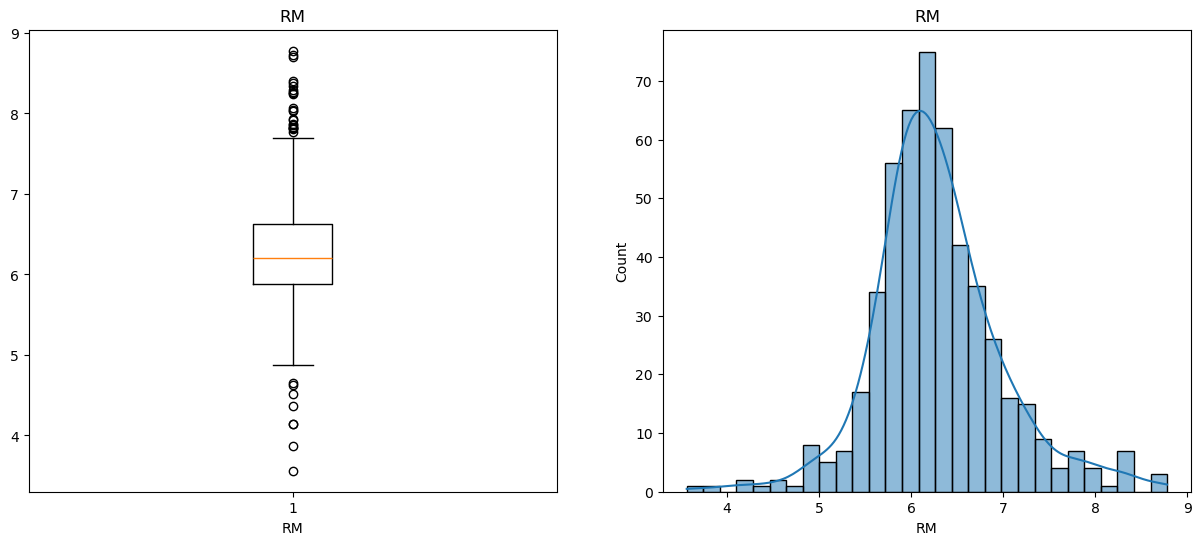

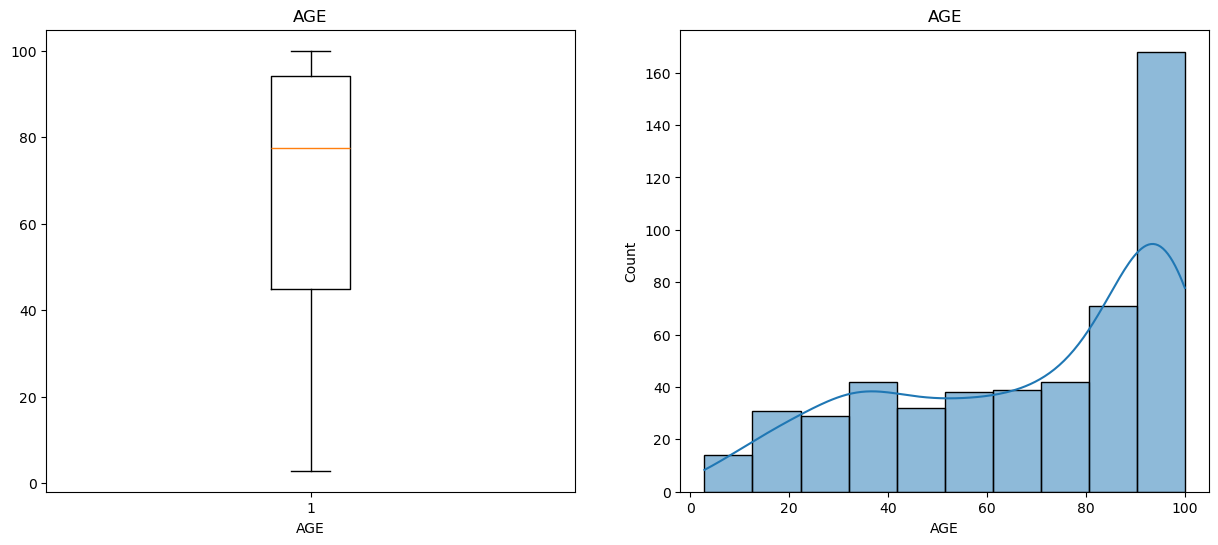

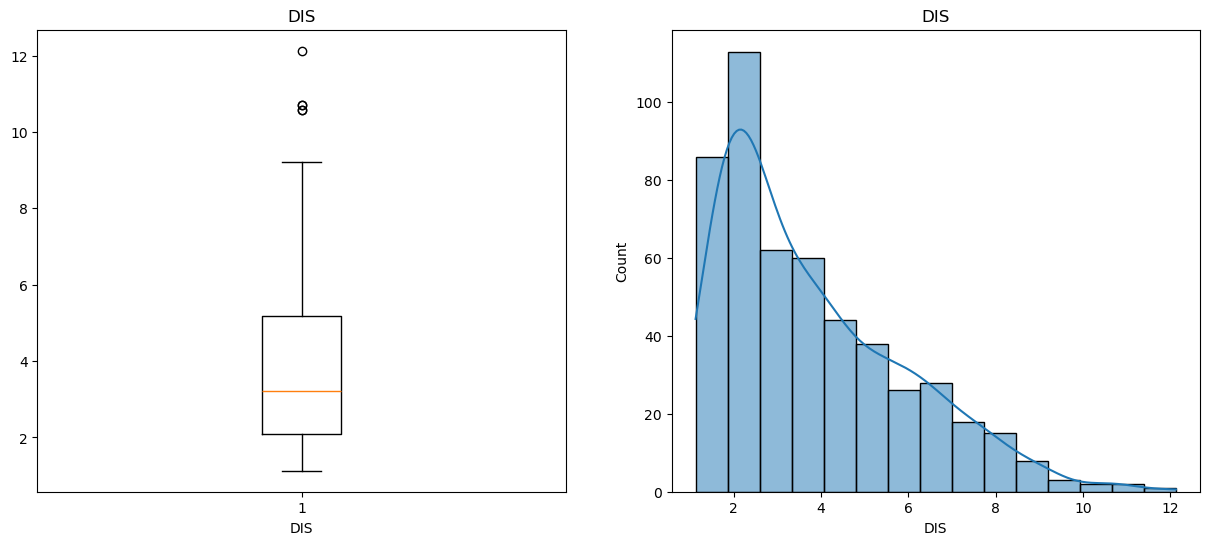

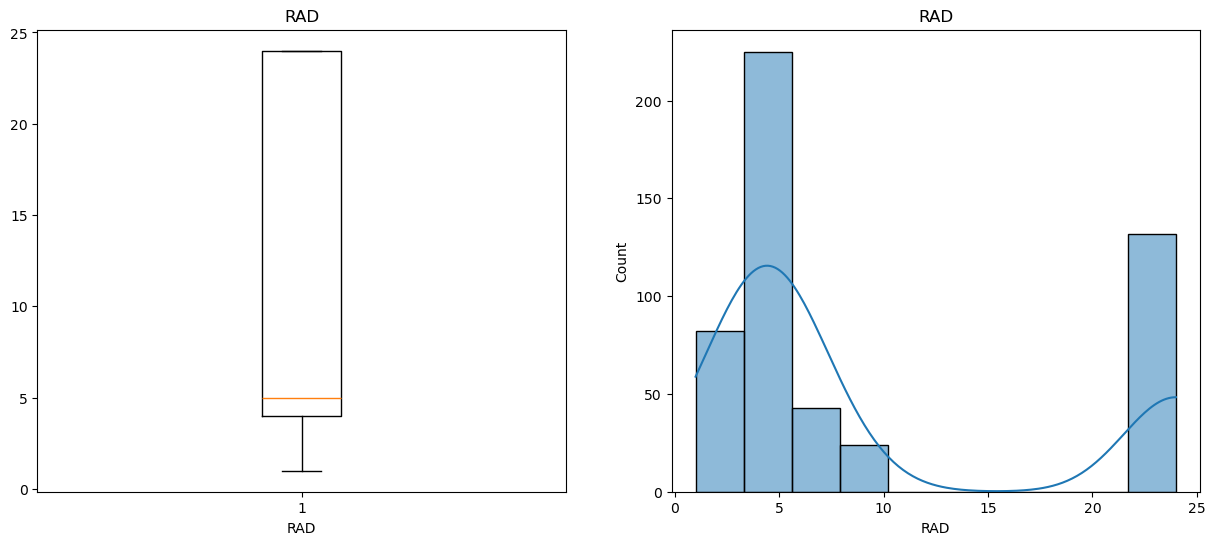

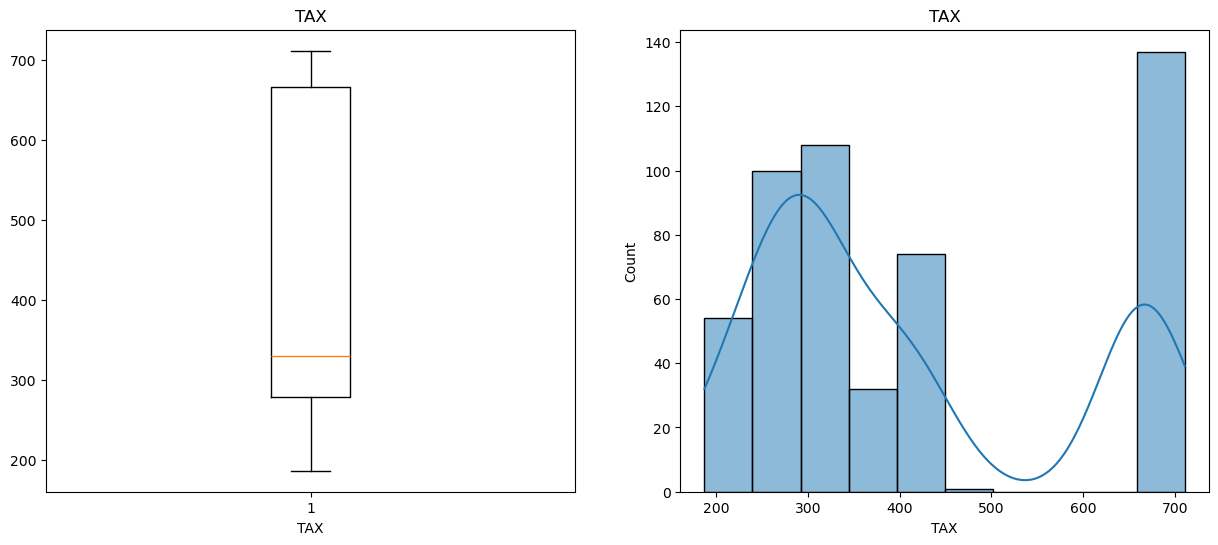

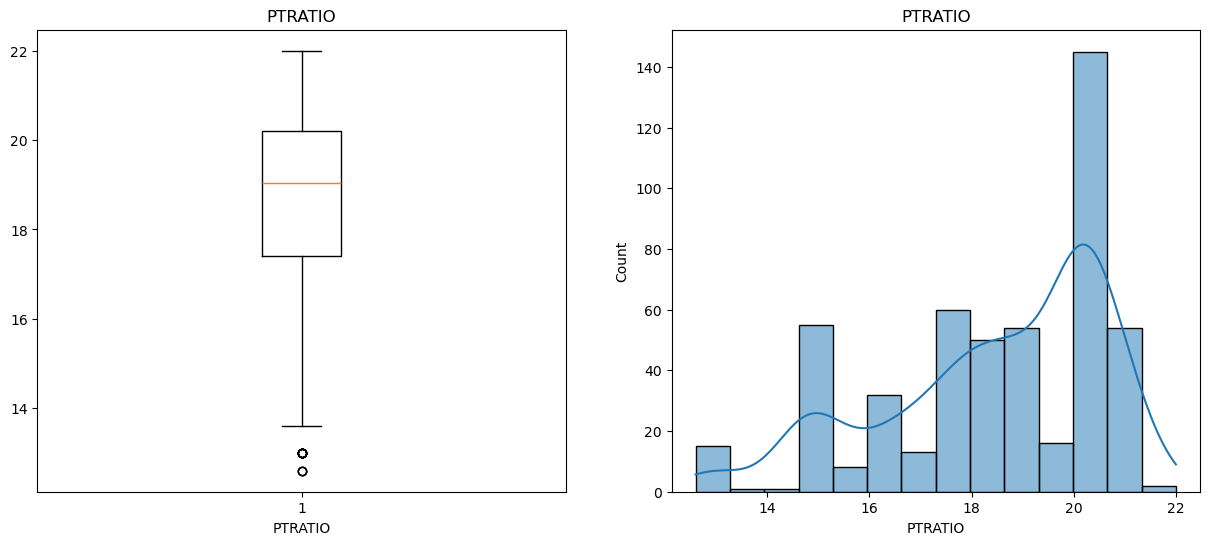

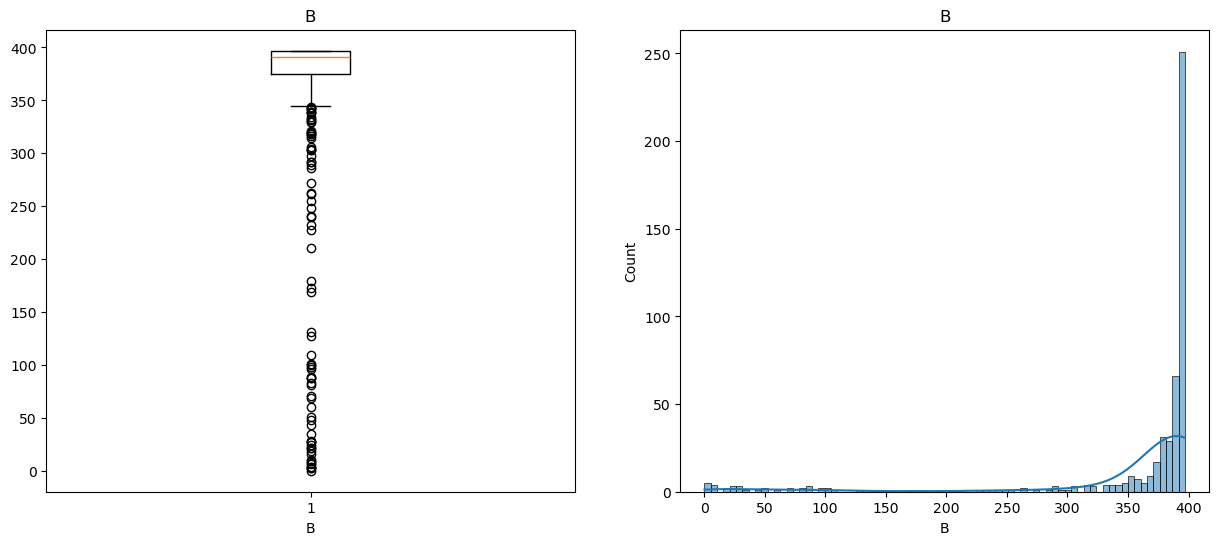

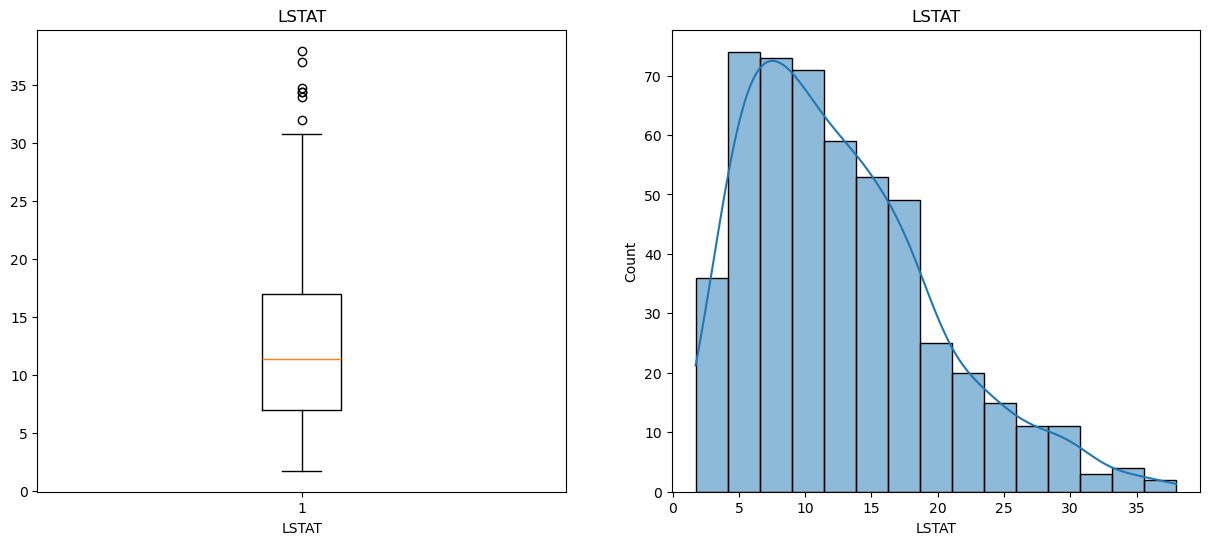

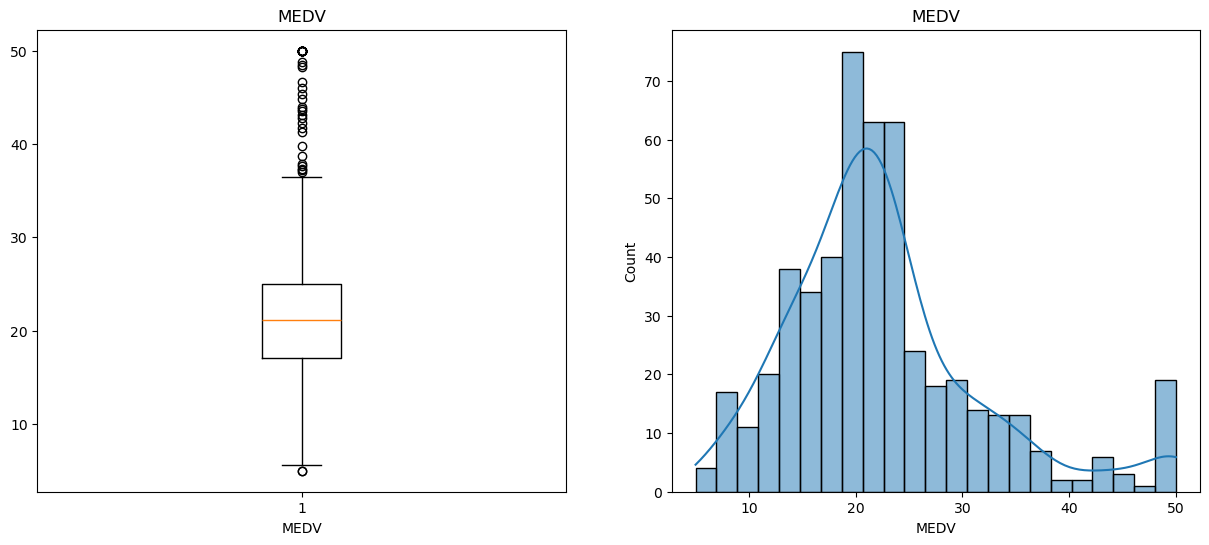

In [7]:
for n in df_num_col:
    plt.figure(figsize=(15,6))
    # plt.subplot(1,2,1)
    plt.subplot(1,2,1)
    plt.boxplot(df[n])
    plt.xlabel(n)
    plt.title(n)
    
    plt.subplot(1,2,2)
    sns.histplot(df[n],kde=True)
    plt.xlabel(n)
    plt.title(n)
    
    plt.show()

In [8]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NX         0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [9]:
z_score_col=['INDUS','NX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
iqr_col=['CRIM','ZN','CHAS','B']

In [10]:
df_1=df.copy()

In [11]:
for n in z_score_col:
    upper_limit=df_1[n].mean()+3*df_1[n].std()
    lower_limit=df_1[n].mean()-3*df_1[n].std()
    
    df_1[n]=np.where(df_1[n]>upper_limit,upper_limit,df_1[n])
    df_1[n]=np.where(df_1[n]<lower_limit,lower_limit,df_1[n])

In [12]:
for n in iqr_col:
    iqr75=df_1[n].quantile(0.75)
    iqr25=df_1[n].quantile(0.25)
    iqr=iqr75-iqr25
    upper_limit_iqr=iqr75+3*iqr
    lower_limit_iqr=iqr25-3*iqr
    df_1[n]=np.where(df_1[n]>upper_limit_iqr,upper_limit_iqr,df_1[n])
    df_1[n]=np.where(df_1[n]<lower_limit_iqr,lower_limit_iqr,df_1[n])
    

In [13]:
df_1.skew()

CRIM       1.670997
ZN         1.614480
INDUS      0.295022
CHAS       0.000000
NX         0.729308
RM         0.431115
AGE       -0.598963
DIS        0.930068
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -1.553021
LSTAT      0.861746
MEDV       1.108098
dtype: float64

In [14]:
X=df_1.drop("MEDV",axis=1)

In [15]:
y=df_1["MEDV"]

In [16]:
lm=LinearRegression()

In [49]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)

In [50]:
scaler=StandardScaler()

In [51]:
train_x_sca=scaler.fit_transform(train_x)

In [52]:
test_x_sca=scaler.transform(test_x)

In [53]:
lm.fit(train_x_sca,train_y)

LinearRegression()

In [59]:
lm_pridict=lm.predict(test_x_sca)
r2score=r2_score(lm_pridict,test_y)
mse=mean_squared_error(lm_pridict,test_y)
rmse=root_mean_squared_error(lm_pridict,test_y)
print(f"R2 Score of leaner regression Model: {r2score}")
print(f"mean square erorr is : {mse}")
print(f"Root mean squre erorr is : {rmse}")
cv=cross_val_score(lm,scaler.transform(X),y,cv=6)
print(cv.mean())

R2 Score of leaner regression Model: 0.5789539280215061
mean square erorr is : 28.869868179096244
Root mean squre erorr is : 5.373068786000813
0.3716346300498725
